# Análisis de Componentes Principales (PCA)
En el presente estudio, se realiza el análisis y modelado de un conjunto de datos relacionado con el uso de tarjetas de crédito. El objetivo principal es reducir la dimensionalidad del conjunto de datos y identificar las variables más influyentes mediante el uso del Análisis de Componentes Principales (PCA, por sus siglas en inglés). Este método de reducción de dimensionalidad permite proyectar los datos en un espacio de menor dimensión mientras se conserva la mayor cantidad posible de la varianza original, facilitando la visualización y el análisis de datos complejos.



In [ ]:
#Cargamos librerias
# Para visualización de datos
import seaborn as sns

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")


In [ ]:
# Cargamos el conjunto de datos desde un archivo CSV.
datos = pd.read_csv('/content/tarjetas.csv', header=0, delimiter=";", decimal=",")

#Visualizamos columnas y primeras filas de la base
datos.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-2.606480e+16,-4.696480e+16,2.496270e+16,-8.372390e+15,1.296810e+15,7.328980e+15,5.190140e+15,-1.300060e+16,7.271590e+15,...,-1.105520e+16,2.176060e+16,-1.347940e+15,1.659590e+15,1.262800e+15,-4.348240e+16,-8.123010e+15,-1.510450e+15,179821,0
1,1,9.851000e+15,-3.560450e+15,5.580560e+15,-4.296540e+15,2.771400e+15,4.286050e+15,4.064660e+15,-1.331180e+16,3.474520e+15,...,-1.949360e+16,-6.057610e+15,7.946910e+15,-5.773950e+15,1.900900e+15,2.965030e+15,-2.480520e+16,-6.451190e+14,653137,0
2,2,-2.602720e+16,-9.493850e+15,1.728540e+16,-4.579860e+15,7.406170e+15,1.419480e+16,7.435110e+15,-9.557600e+15,-2.612970e+15,...,-5.020280e+16,7.029060e+15,9.450450e+15,-1.154670e+16,-6.055640e+15,-3.128950e+15,-3.002580e+13,-2.447180e+16,251354,0
3,3,-1.521520e+16,-5.089590e+14,1.746840e+15,-1.090180e+15,2.494860e+15,1.143310e+16,5.182690e+15,-6.512990e+14,-2.056980e+15,...,-1.469270e+15,-3.821250e+16,-2.140480e+16,-1.893130e+16,1.003960e+16,-5.159500e+15,-1.653160e+16,4.842360e+16,538444,0
4,4,-2.068200e+15,-1.652800e+16,1.527050e+16,-4.482930e+16,1.061250e+16,5.305490e+15,6.588490e+14,-2.126600e+16,1.049920e+16,...,-1.069840e+16,7.297270e+14,-1.616660e+16,3.125610e+16,-4.141160e+15,1.071130e+15,2.371160e+16,4.191170e+14,1427897,0


In [ ]:
#Usamos la función info() para conocer el tipo de datos de cada columna
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22406 entries, 0 to 22405
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      22406 non-null  int64  
 1   V1      22406 non-null  float64
 2   V2      22406 non-null  float64
 3   V3      22406 non-null  float64
 4   V4      22406 non-null  float64
 5   V5      22406 non-null  float64
 6   V6      22406 non-null  float64
 7   V7      22406 non-null  float64
 8   V8      22406 non-null  float64
 9   V9      22406 non-null  float64
 10  V10     22406 non-null  float64
 11  V11     22406 non-null  float64
 12  V12     22406 non-null  float64
 13  V13     22406 non-null  float64
 14  V14     22406 non-null  float64
 15  V15     22406 non-null  float64
 16  V16     22406 non-null  float64
 17  V17     22406 non-null  float64
 18  V18     22406 non-null  float64
 19  V19     22406 non-null  float64
 20  V20     22406 non-null  float64
 21  V21     22406 non-null  float64
 22

In [ ]:
#Excluimos de la base las columnas de variables categoricas
datos = datos.drop("id", axis=1)
datos = datos.drop("Class", axis=1)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22406 entries, 0 to 22405
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      22406 non-null  float64
 1   V2      22406 non-null  float64
 2   V3      22406 non-null  float64
 3   V4      22406 non-null  float64
 4   V5      22406 non-null  float64
 5   V6      22406 non-null  float64
 6   V7      22406 non-null  float64
 7   V8      22406 non-null  float64
 8   V9      22406 non-null  float64
 9   V10     22406 non-null  float64
 10  V11     22406 non-null  float64
 11  V12     22406 non-null  float64
 12  V13     22406 non-null  float64
 13  V14     22406 non-null  float64
 14  V15     22406 non-null  float64
 15  V16     22406 non-null  float64
 16  V17     22406 non-null  float64
 17  V18     22406 non-null  float64
 18  V19     22406 non-null  float64
 19  V20     22406 non-null  float64
 20  V21     22406 non-null  float64
 21  V22     22406 non-null  float64
 22

In [ ]:
# Instanciamos el estandarizador (StandardScaler).
scaler = StandardScaler()

# Estandarizamos las features.
# Esto significa que transformamos las features para que tengan media 0 y desviación estándar 1.
feature_names = datos.columns
datos[feature_names] = scaler.fit_transform(datos[feature_names])


In [ ]:
#Verificamos que ya no haya valore nulos
# Obtener una máscara booleana que indica dónde están los valores nulos
mask_nulos = datos.isnull()

# Obtener las filas donde hay valores nulos para cada columna
filas_con_nulos_por_columna = {col: datos[mask_nulos[col]].index.tolist() for col in datos.columns}

# Mostrar las filas con valores nulos por columna
for col, filas in filas_con_nulos_por_columna.items():
    print(f"Columna '{col}': Valores nulos en filas {filas}")

# Eliminar la fila en la posición 10000, 10001, 10002, 10003, 10004
# Obtener las posiciones de las filas a eliminar
filas_a_eliminar = [14474]

# Eliminar las filas con valores nulos en las posiciones especificadas
datos.drop(filas_a_eliminar, inplace=True)

Columna 'V1': Valores nulos en filas []
Columna 'V2': Valores nulos en filas []
Columna 'V3': Valores nulos en filas []
Columna 'V4': Valores nulos en filas []
Columna 'V5': Valores nulos en filas []
Columna 'V6': Valores nulos en filas []
Columna 'V7': Valores nulos en filas []
Columna 'V8': Valores nulos en filas []
Columna 'V9': Valores nulos en filas []
Columna 'V10': Valores nulos en filas []
Columna 'V11': Valores nulos en filas []
Columna 'V12': Valores nulos en filas []
Columna 'V13': Valores nulos en filas []
Columna 'V14': Valores nulos en filas []
Columna 'V15': Valores nulos en filas []
Columna 'V16': Valores nulos en filas []
Columna 'V17': Valores nulos en filas []
Columna 'V18': Valores nulos en filas []
Columna 'V19': Valores nulos en filas []
Columna 'V20': Valores nulos en filas []
Columna 'V21': Valores nulos en filas []
Columna 'V22': Valores nulos en filas []
Columna 'V23': Valores nulos en filas []
Columna 'V24': Valores nulos en filas []
Columna 'V25': Valores nu

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5' , 'PC6', 'PC7', 'PC8', 'PC9','PC10', 'PC11','PC12', 'PC13', 'PC14', 'PC15' , 'PC16', 'PC17', 'PC18', 'PC19','PC20', 'PC21','PC22', 'PC23', 'PC24', 'PC25' , 'PC26', 'PC27', 'PC28', 'PC29']
)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
PC1,0.140092,-0.238573,0.274453,-0.220214,0.199981,0.169997,0.263089,-0.193886,0.251868,0.278155,...,-0.163101,-0.232770,-0.048833,-0.031863,0.026215,0.037958,0.007924,-0.185264,-0.092697,-0.007260
PC2,0.230544,0.078201,-0.083912,0.054988,0.242291,-0.178306,0.009853,-0.071744,-0.060066,-0.085596,...,0.127267,0.028548,-0.277189,-0.317725,-0.296411,0.293472,0.143233,0.223216,0.293729,-0.021069
PC3,-0.079897,-0.057636,0.032809,-0.067089,0.006840,0.031076,-0.055108,-0.060033,0.038902,-0.030650,...,-0.021369,0.110936,0.261437,0.061986,0.011618,-0.244855,-0.268810,0.072025,0.158615,-0.002051
PC4,0.171619,-0.025884,-0.058060,-0.027215,-0.109341,-0.244617,-0.045100,0.077178,-0.081251,-0.055888,...,-0.127515,-0.020929,-0.046205,-0.372994,0.271632,0.489514,-0.487575,-0.155233,-0.268754,-0.113854
PC5,0.232229,0.045159,-0.210746,0.158005,-0.028255,0.053939,0.022093,-0.315040,-0.115320,-0.117696,...,-0.344644,-0.098699,0.147164,0.225144,-0.160243,-0.019446,0.070074,-0.331555,-0.374747,-0.096597
PC6,-0.196843,0.201168,-0.050216,0.031184,-0.082838,-0.032598,-0.044966,-0.120401,0.065726,-0.033751,...,0.011125,-0.051320,-0.430560,0.330059,0.466111,-0.094622,-0.305548,-0.047836,0.211173,-0.010585
PC7,-0.024646,-0.020240,0.016740,0.064203,-0.022968,0.177294,-0.010649,-0.121063,-0.025760,-0.038336,...,0.113329,-0.057346,0.316344,-0.225021,0.000735,-0.019693,-0.205024,0.020619,-0.037568,0.718030
PC8,0.233167,0.012412,-0.073169,-0.037928,-0.027827,-0.215973,-0.001180,0.042150,-0.047076,0.005354,...,-0.128994,0.017275,-0.254919,0.146637,0.171190,0.047437,0.193079,-0.072325,0.008422,0.651138
PC9,0.340370,-0.057376,-0.059547,0.106994,0.056714,-0.164869,0.047512,-0.248153,-0.100264,-0.078252,...,0.252854,-0.108615,0.430594,-0.087981,0.524291,-0.155503,0.070614,0.148560,0.152000,-0.172338
PC10,0.070801,0.027065,-0.062394,-0.079424,0.156491,0.118289,-0.014930,-0.240644,0.149128,-0.027908,...,-0.027089,0.041563,0.094502,0.069526,-0.339370,0.097923,-0.546919,-0.014552,0.329777,0.011473


Notamos que las variables Volumen, Energía y Acustica son las más influyentes pero por poca diferncia con el resto

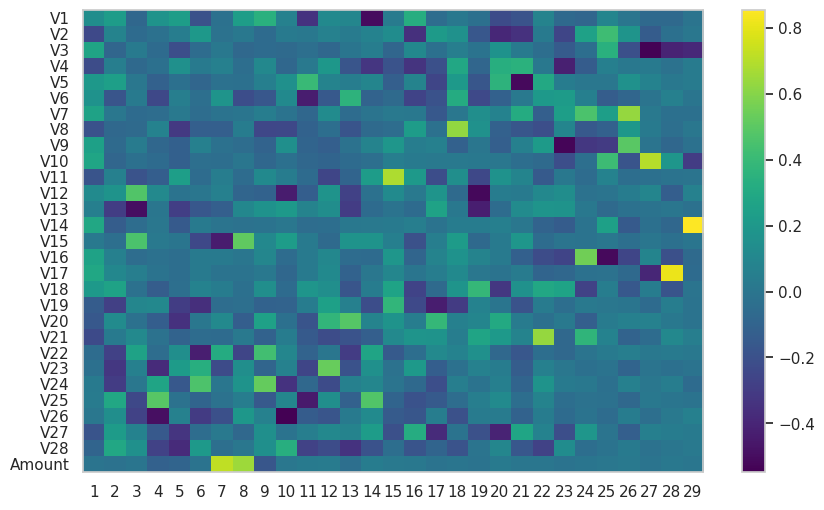

In [ ]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), (datos.columns))
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.20283149 0.04991108 0.04300663 0.03951689 0.03789382 0.03541393
 0.03457252 0.03434202 0.03293027 0.03172722 0.03105082 0.03044104
 0.02836042 0.02823958 0.02710576 0.02653204 0.02592496 0.02559294
 0.02463669 0.02403517 0.02393738 0.02350383 0.02231385 0.02136179
 0.02085958 0.02046418 0.01906898 0.01815463 0.01627047]


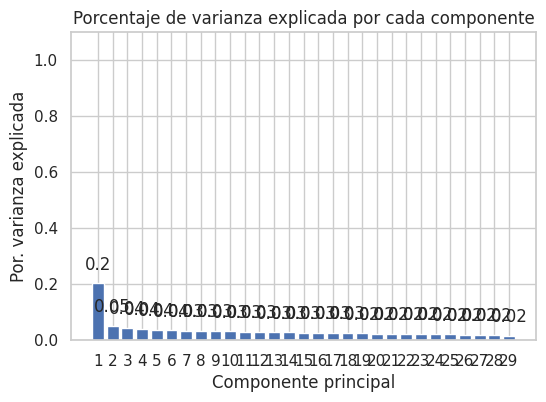

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.20283149 0.25274258 0.2957492  0.33526609 0.37315991 0.40857385
 0.44314637 0.47748839 0.51041866 0.54214587 0.57319669 0.60363773
 0.63199815 0.66023773 0.68734349 0.71387553 0.73980049 0.76539344
 0.79003012 0.8140653  0.83800268 0.86150651 0.88382037 0.90518216
 0.92604174 0.94650592 0.9655749  0.98372953 1.        ]


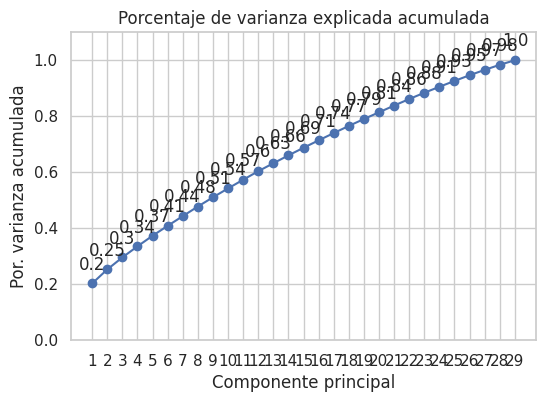

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [ ]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5' , 'PC6', 'PC7', 'PC8', 'PC9','PC10', 'PC11','PC12', 'PC13', 'PC14', 'PC15' , 'PC16', 'PC17', 'PC18', 'PC19','PC20', 'PC21','PC22', 'PC23', 'PC24', 'PC25' , 'PC26', 'PC27', 'PC28', 'PC29'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
0,1.642947,-1.584196,2.832659,1.288824,-0.943700,-0.183304,-0.081916,-1.851904,0.079534,1.310394,...,1.301202,1.068336,-0.572411,0.559190,-0.703411,-0.380452,-0.752438,-0.113219,-0.488505,-0.685578
1,2.170336,0.493593,-0.062925,-0.296314,0.928592,0.121523,-0.775976,0.077451,0.363525,0.033687,...,-0.081696,-0.134284,-0.613536,0.327412,-0.773380,0.089239,-0.565723,-0.952290,1.185332,-0.117978
2,2.103357,-1.022278,1.374598,-0.385396,0.391741,-0.190118,-1.222028,-0.562358,-0.342747,0.079035,...,-0.342480,0.886122,-1.279210,0.649846,-0.905007,0.273609,-0.187746,-0.000553,-0.353905,-0.286519
3,0.536929,2.413938,0.092052,-0.238920,-1.373975,1.245697,-0.798284,-0.800707,-1.709087,0.839907,...,0.170033,0.566273,-0.109521,1.919220,-1.447257,1.018966,0.189565,-0.449635,1.173990,0.047570
4,2.081723,-0.837553,1.238406,0.407114,-3.094238,-0.447457,0.621791,-0.032390,1.369450,-1.049052,...,-0.368064,-1.111951,0.222424,0.069023,0.808138,-0.372335,-0.814446,0.041186,-0.419791,0.647894


In [ ]:
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5' , 'PC6', 'PC7', 'PC8', 'PC9','PC10', 'PC11','PC12', 'PC13', 'PC14', 'PC15' , 'PC16', 'PC17', 'PC18', 'PC19','PC20', 'PC21','PC22', 'PC23', 'PC24', 'PC25' , 'PC26', 'PC27', 'PC28', 'PC29'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
0,1.642947,-1.584196,2.832659,1.288824,-0.943700,-0.183304,-0.081916,-1.851904,0.079534,1.310394,...,1.301202,1.068336,-0.572411,0.559190,-0.703411,-0.380452,-0.752438,-0.113219,-0.488505,-0.685578
1,2.170336,0.493593,-0.062925,-0.296314,0.928592,0.121523,-0.775976,0.077451,0.363525,0.033687,...,-0.081696,-0.134284,-0.613536,0.327412,-0.773380,0.089239,-0.565723,-0.952290,1.185332,-0.117978
2,2.103357,-1.022278,1.374598,-0.385396,0.391741,-0.190118,-1.222028,-0.562358,-0.342747,0.079035,...,-0.342480,0.886122,-1.279210,0.649846,-0.905007,0.273609,-0.187746,-0.000553,-0.353905,-0.286519
3,0.536929,2.413938,0.092052,-0.238920,-1.373975,1.245697,-0.798284,-0.800707,-1.709087,0.839907,...,0.170033,0.566273,-0.109521,1.919220,-1.447257,1.018966,0.189565,-0.449635,1.173990,0.047570
4,2.081723,-0.837553,1.238406,0.407114,-3.094238,-0.447457,0.621791,-0.032390,1.369450,-1.049052,...,-0.368064,-1.111951,0.222424,0.069023,0.808138,-0.372335,-0.814446,0.041186,-0.419791,0.647894


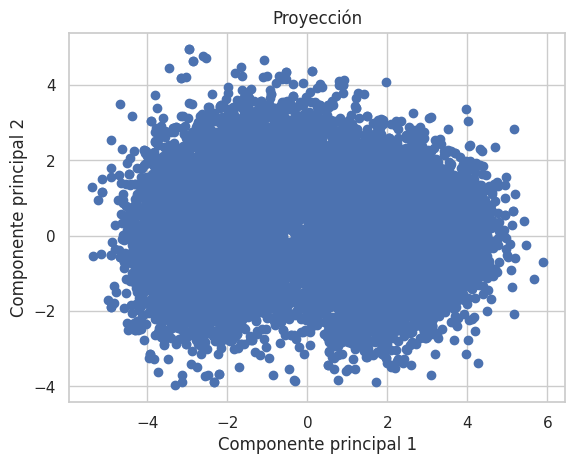

In [ ]:
#Grafico de dispersión para visualizar la proyeccin
cp1 = proyecciones.iloc[:, 0:1]
cp2 = proyecciones.iloc[:, 1:2]
plt.scatter(cp1,cp2)
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("Proyección")
plt.show()

## Matriz de correlaciones

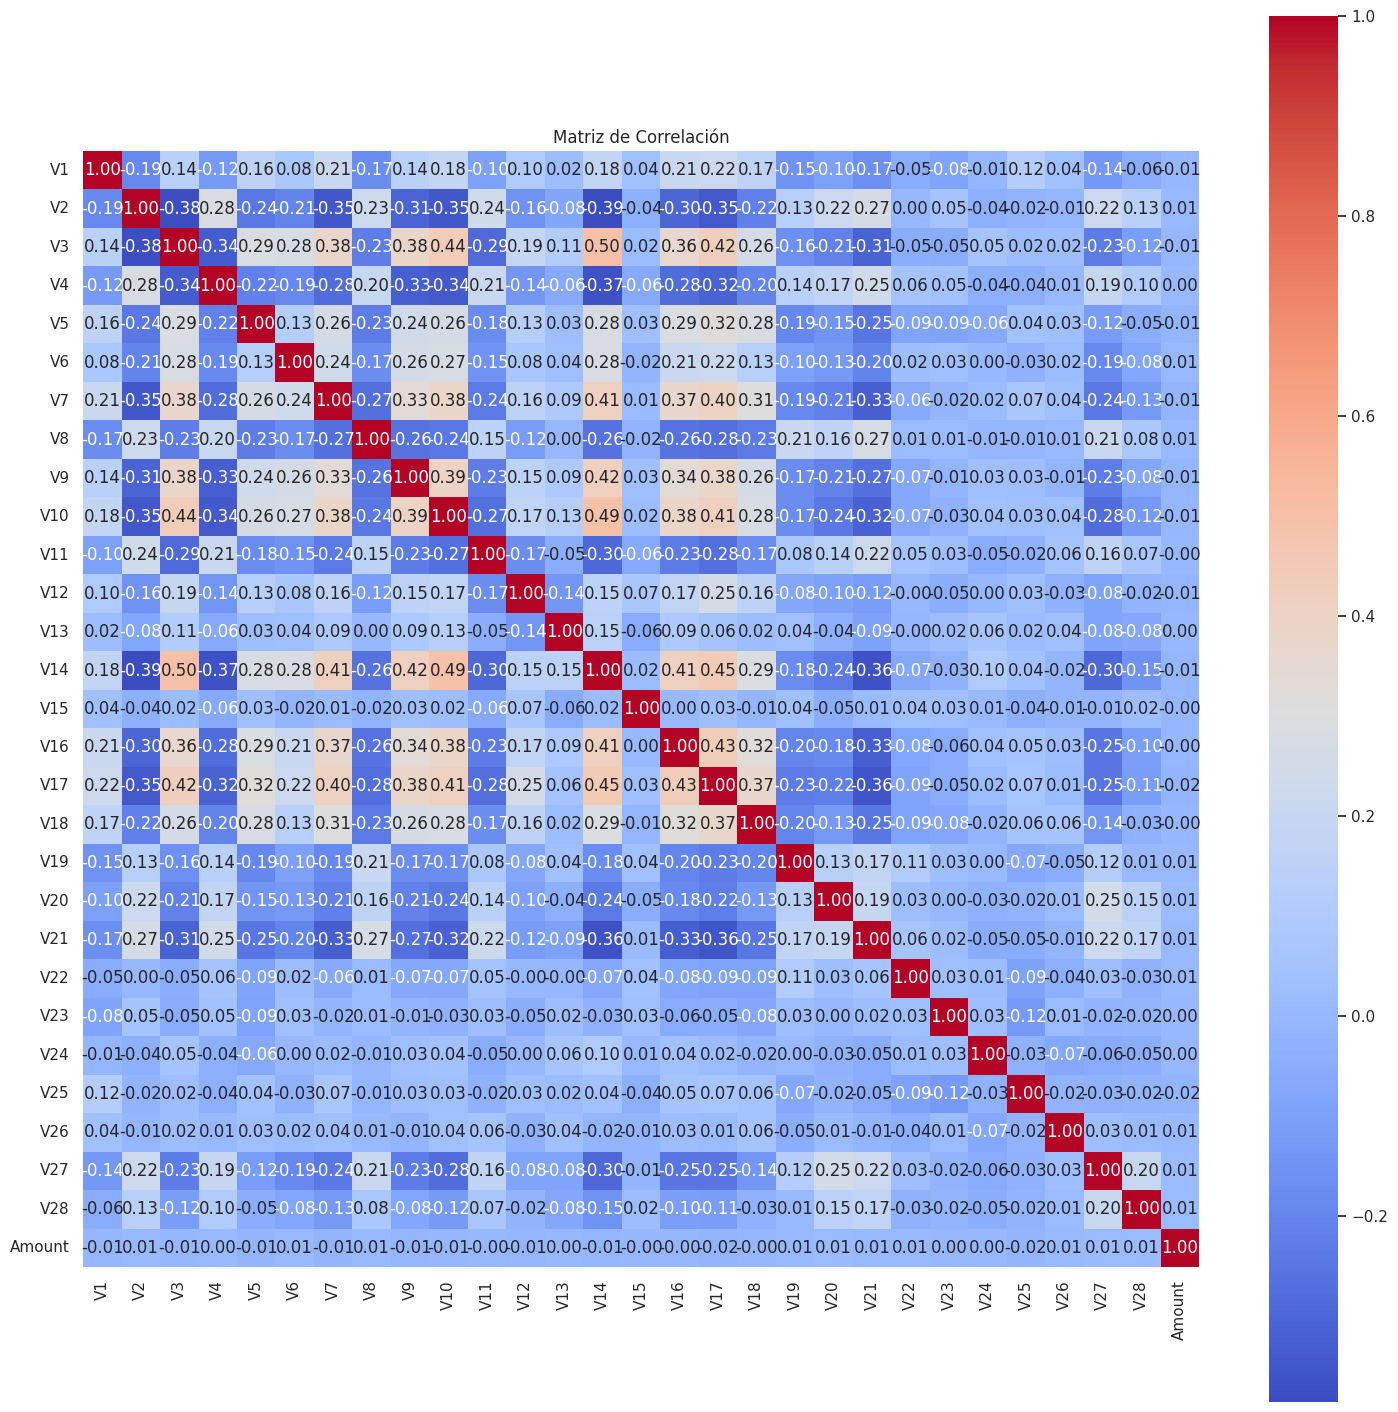

In [ ]:
#Creamos matriz de correlación
correlation_matrix = datos.corr()

# Crear un gráfico de matriz de correlación con seaborn
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación')
plt.show()

Podemos notar muy poca correlación entre las variables

Luego de analizar los resultados podemos concluir que el modelo ha demostrado ser util para la identificación de las variables más influyentes y la eliminación de redundancias. Esto facilita una mejor comprensión de la estructura de los datos, preparando el terreno para futuros análisis y modelos predictivos más robustos.






